In [1]:
from qiskit import QuantumCircuit
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram
from qiskit import transpile
from qiskit.providers.aer import AerSimulator

import math

In [2]:
# definindo quantidade de qbits a serem utilizados
n = 3
N = math.pow(2,n)
t = int((math.pi/4)*math.sqrt(N))

In [3]:
# criando todos os estados possiveis
samples = []
for i in range(int(N)):
    samples.append(bin(i)[2:].zfill(n)) # transformar numero no equivalente binario

# samples # exibir todas os estados

In [4]:
# inicializando o circuito
qc = QuantumCircuit(n, n) # circuito de n qbit com n registradores classicos

In [5]:
# inserindo porta de Hadamard
qc.h(range(n))

In [6]:
# definindo a construção da função oráculo
def create_oracle():
    n_samples = list(range(n))
    make_oracle = []
    for i in samples:
        tmp = []
        for j in range(len(i)):
            if i[j] == "0":
                tmp.append(n_samples[j])
        make_oracle.append(tmp)
    # print(make_oracle)

    for i in make_oracle:
        qc.barrier()
        if i:
            qc.x(i)
        qc.cz(n-1, range(n-1))
        if i:
            qc.x(i)

In [7]:
def create_diffuser():
    qc.barrier()
    qc.h(range(n))
    qc.x(range(n))
    qc.cz(n-1, range(n-1))
    qc.x(range(n))
    qc.h(range(n))

In [8]:
# criando o circuito para o algoritmo de Grover
for i in range(t):
    create_oracle()
    create_diffuser()
    qc.h(range(n))
    qc.barrier()
    
qc.barrier()
qc.measure(range(n), range(n))

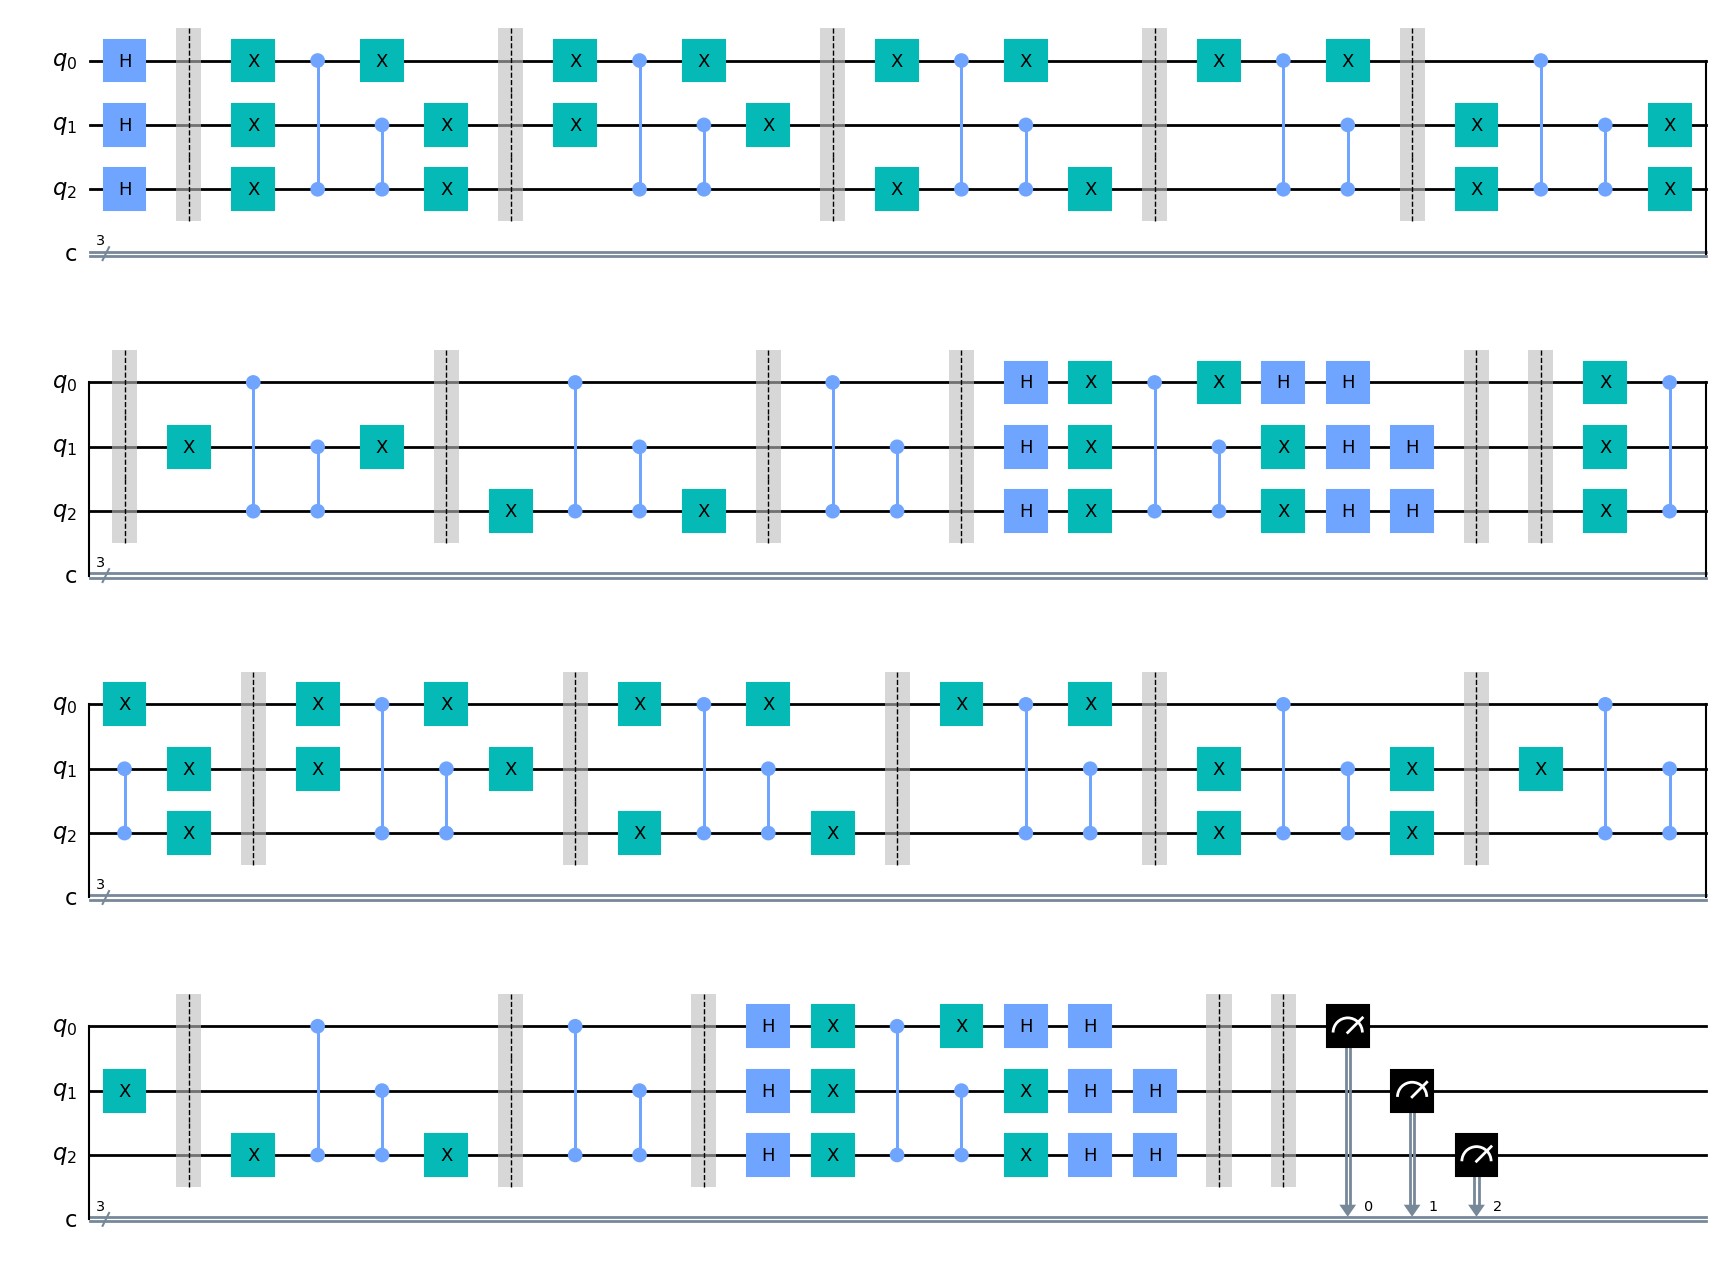

In [9]:
# imagem do circuito quântico 
qc.draw(output='mpl')

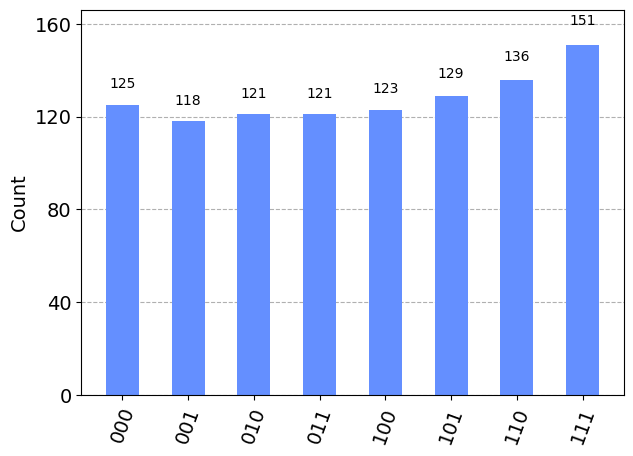

In [10]:
backend = AerSimulator()
qc_compiled = transpile(qc, backend)

job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)